#### This is a secound version of the Wally_CSV prepper. 
Couldnt get the figure out what caused the error in Edge Impulse DSP block, when uploading to ingestion service.
After trying out different formats, and just uploading normal png's, i found out in my case that the "easiest" way
was to convert all np arrays to pictures, devided into 2 folders (Test and Training) with their labels plus a unique name(otherwise we would just overwrite abunch of pictures)
Then afterwards i upload them manulally

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

import random, os, PIL, json, time, hmac, hashlib, requests, threading, queue
import shortuuid

from skimage.transform import resize   

In [36]:
### Settings

#Folders for training and test sets:
TRAINFOLDER = "trainPNG"
TESTFOLDER = "testPNG"

# Project folder:
PROJECTDIR = "/home/kultul/Wally"

# Number of threads to run to upload data to Edge Impulse
NUM_THREADS = 20

In [3]:
train_df = pd.read_csv('dataset/sign_mnist_train.csv')
test_df = pd.read_csv('dataset/sign_mnist_test.csv')

In [4]:
train_label=train_df['label']
train_label.astype(str)
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [5]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28)
print(X_train.shape)

(27455, 28, 28)


In [6]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)

(7172, 784)


Text(0.5, 1.0, 'label: 13  letter: M')

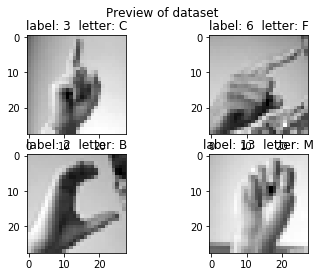

In [7]:
#View some of the training samples.
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [8]:
### Convert list of samples into Numpy arrays so we can convert them into png

# Convert sets
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Print out the new Numpy array shapes (always a good idea to check the shapes!)
print("Training X:", X_train.shape)
print("Test X:", X_test.shape)


Training X: (27455, 28, 28)
Test X: (7172, 784)


In [37]:
def mkdir(label):
    path = label
    global PROJECTDIR
    os.chdir(PROJECTDIR)
    if (os.path.exists(path)):
        print(f"dir for {path} exists")
    else:
        os.makedirs(path)
        print(f"dir for {path} created")

In [49]:
def csvToPNG(folder):
    global q
    os.chdir(folder)
    while not q.empty():
        sample, label = q.get()
        data = im.fromarray((sample*255).astype(np.uint8))
        name = f"{label}" + "." + shortuuid.ShortUUID().random(length=22) + ".png"
        data.save(name)

In [51]:
#This way i could manually upload the image and the DSP block in Edge impulse didnt break!! Great success. Not to 
#automate it a bit
mkdir(TRAINFOLDER)
len_vector = len(X_train)

q = queue.Queue()
for i in range(len_vector):
  q.put((X_train[i], train_label[i]))

csvToPNG(TRAINFOLDER)

dir for trainPNG created


In [50]:
#This way i could manually upload the image and the DSP block in Edge impulse didnt break!! Great success. Not to 
#automate it a bit
mkdir(TESTFOLDER)
len_vector = len(X_test)

q = queue.Queue()
for i in range(len_vector):
  q.put((X_train[i], train_label[i]))

csvToPNG(TESTFOLDER)

dir for testPNG exists
